**GROUP PROJECT PROPOSAL**


# **Predicting Heart Disease: Analyzing Age, Blood Pressure, and Maximum Heart Rate**
#### ARYAN JAIN, KATIE LIANG, MADILYN PORTAS, VIBHAV DAMANI

## INTRODUCTION

Heart disease, or cardiovascular disease, broadly encompasses various diseases related to the heart and blood vessels. Risk factors associated with the development of this disease include high blood pressure, and a lower maximum heart rate. Age similarly plays a significant role, with older individuals being more susceptible. This project aims to utilize these risk factors to categorize whether patients have heart disease.

Can we predict whether a new patient has heart disease based on their age, blood pressure levels, and maximum heart rate?
We will employ the Heart Disease dataset from Hungary, which comprises 76 attributes, including the variables we aim to explore, but may contain missing values, represented by “?”. We will visualize the resulting data, after using K-nearest neighbours, to show where the test points lie on the training data. 


## METHOD

We are using the Heart Disease Database (Hungarian data) to predict whether patients have heart disease. The dataset has 294 observations, and includes 14 numerical variables. 
Key variables:
- "age": Patient's age in years.
- "sex": Patient's gender (1 stands for male and 0 for female).
- "cp": The type of chest pain the patient is experiencing.
- "trestbps": Patient's resting blood pressure on admission (mmHg).
- "chol": Patient's serum cholesterol (mg/dl).
- "fbs": Whether the patient has fasting blood sugar levels greater than 120 mg/dl, (1 for "True" and 0 for "False").
- "restecg": Results of the patient's resting electrocardiogram.
- "thalach": Maximum heart rate the patient achieved.
- "exang": Whether the patient experiences exercise-induced angina (1 for "True" and 0 for "False").
- "oldpeak": Represents ST depression induced by exercise relative to rest.
- "slope": Slope of the peak exercise ST segment.
- "ca": The number of major vessels colored by fluoroscopy.
- "thal": The patient's thalassemia.
- "num": Diagnosis of heart disease (1 stands for heart disease and 0 for no diagnosis). 


We replaced "?" values with "NA." We divided the dataset into a 75% training set and a 25% testing set using "initial_split.”

We explored the data by grouping it based on "num" and calculated the minimum, maximum, and average values for "age," "trestbps," and "thalach." We observed that patients with heart disease tend to have higher "age" and "trestbps" values, but lower "thalach" values compared to those without heart disease, which was supported by visualizations created by plotting various numerical variables against each other, and coloring the data points based on "num."

As a result, we selected "age," "trestbps," and "thalach" as the key predictor variables for our analysis.


In [44]:
#Importing Libraries
library(tidyverse)
library(tidymodels)
library(repr)
library(RColorBrewer)
library(dplyr)

In [54]:
# Reading the data
column_names <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data"
heart_data <- read_csv(url, col_names = column_names)

# Cleaning and wrangling data
heart_data[heart_data == "?"] <- NA

heart_clean <- heart_data |>
  mutate(
    num = as.factor(as.integer(num)),
    num = recode(num, "0" = 'No', "1" = 'Yes'),
    trestbps = as.integer(trestbps),
    chol = as.factor(as.integer(chol)),
    fbs = as.factor(as.integer(fbs)),
    thalach = as.integer(thalach),
    exang = as.factor(as.integer(exang)),
    slope = as.factor(as.integer(slope)),
    ca = as.factor(as.integer(ca)),
    thal = as.factor(as.integer(thal))
  )

# Splitting the data
heart_split <- initial_split(heart_clean, prop = 0.75, strata = num)
heart_training <- training(heart_split)
heart_testing <- testing(heart_split)

Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): trestbps, chol, fbs, restecg, thalach, exang, slope, ca, thal
dbl (5): age, sex, cp, oldpeak, num

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [55]:
#creating the summary

heart_summary <- heart_training |>
  group_by(num) |>
  summarize(
    min_age = min(age),
    max_age = max(age),
    mean_age = mean(age),
    min_trestbps = min(as.numeric(trestbps)),
    max_trestbps = max(as.numeric(trestbps)),
    mean_trestbps = mean(as.numeric(trestbps)),
    min_thalach = min(as.numeric(thalach)),
    max_thalach = max(as.numeric(thalach)),
    mean_thalach = mean(as.numeric(thalach)),
    n_of_patients = n()
  )

heart_summary

num,min_age,max_age,mean_age,min_trestbps,max_trestbps,mean_trestbps,min_thalach,max_thalach,mean_thalach,n_of_patients
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
No,28,62,46.96454,NA,NA,NA,NA,NA,NA,141
Yes,33,65,49.67089,92,180,136.557,82,180,129.519,79


Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


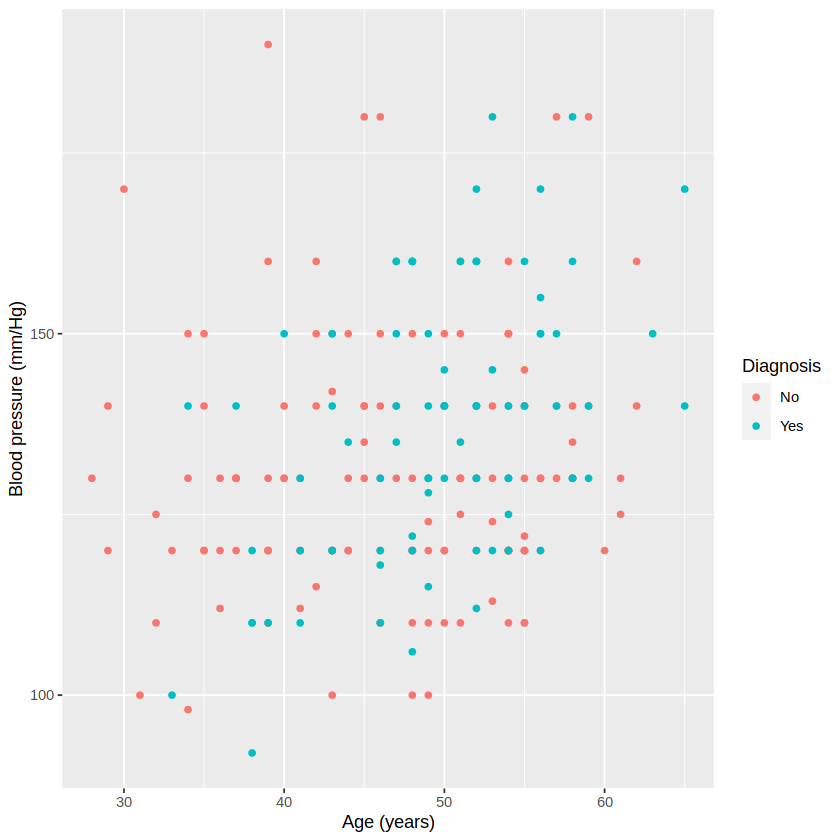

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


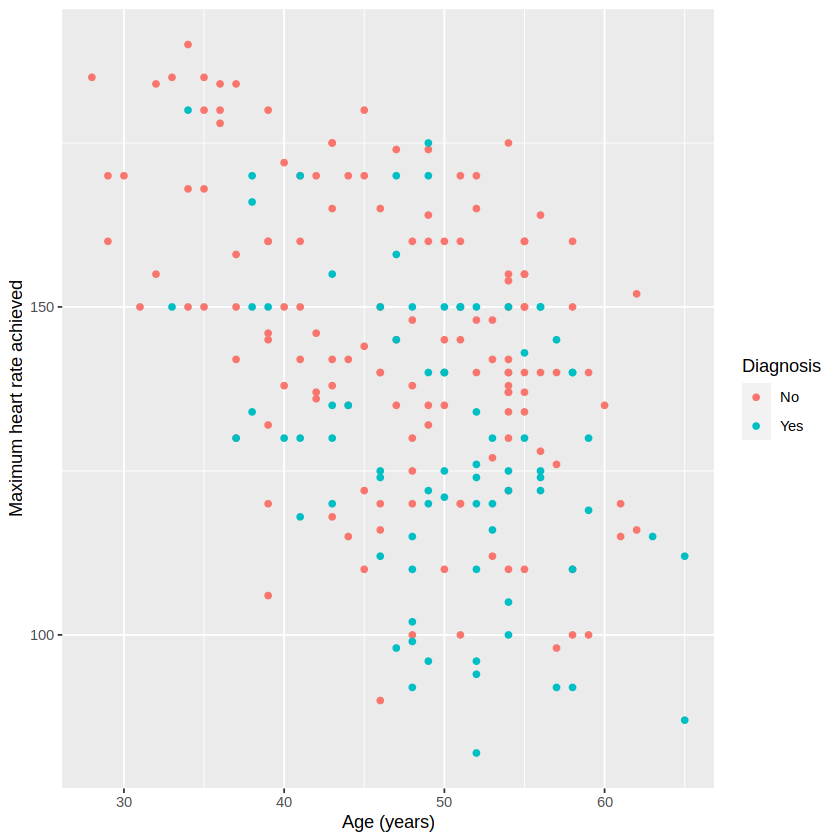

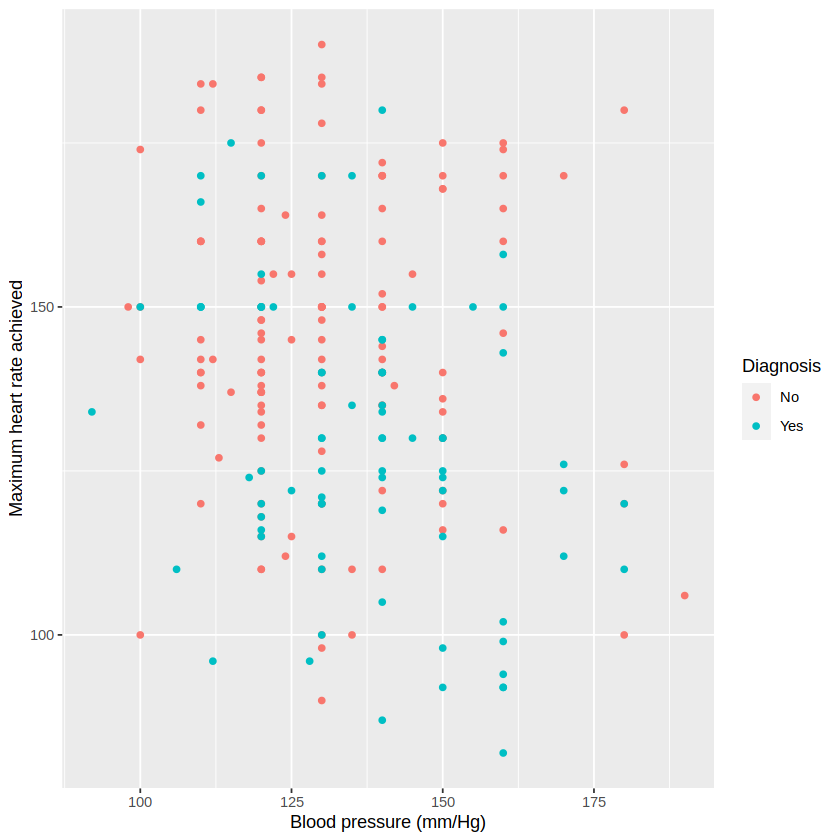

In [56]:
#plotting the training date

plot_1 <- ggplot(heart_training, aes(x = age, y = trestbps, color = num)) +
          geom_point() +
          labs (x = "Age (years)", y = "Blood pressure (mm/Hg)", color = "Diagnosis")+
          scale_y_continuous(breaks = c(100, 150, 200, 250))
plot_1

plot_2 <- ggplot(heart_training, aes(x = age, y = thalach, color = num)) +
          geom_point() +
          labs (x = "Age (years)", y = "Maximum heart rate achieved", color = "Diagnosis")+
          scale_y_continuous(breaks = c(100, 150, 200, 250))
plot_2

plot_3 <- ggplot(heart_training, aes(x = trestbps , y = thalach, color = num)) +
          geom_point() +
          labs (x = "Blood pressure (mm/Hg)", y = "Maximum heart rate achieved" , color = "Diagnosis")+
          scale_y_continuous(breaks = c(100, 150, 200, 250))
plot_3

## SIGNIFICANCE

We hypothesize that heart disease likelihood is affected by blood pressure, maximum heart rate and age. We anticipate significant differences between heart disease and non-heart disease patients, with the former group having higher blood pressure, lower maximum heart rate, and older age.

We aim to develop a classification system for heart disease based on these predictors, which could help doctors in diagnosis and treatment. It could also help patients understand their risk factors and take preventive measures.

Some possible extensions of our analysis are:

- How does each predictor affect the severity of heart disease?
- What are the optimal cutoff values for each predictor to classify patients into different categories of heart disease?

# BIBLIOGRAPHY

Detecting and Treating Heart Failure. (2002, November 1). WebMD. https://www.webmd.com/heart-disease/heart-failure/understanding-heart-failure-treatment.

Rodgers, J. L., Jones, J., Bolleddu, S. I., Vanthenapalli, S., Rodgers, L. E., Shah, K., Karia, K., & Panguluri, S. K. (2019, April 27). Cardiovascular risks associated with gender and aging. Journal of cardiovascular development and disease. Retrieved November 10, 2021, from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6616540/.

The creators of the Heart Disease Database are:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

Nichols, M., Townsend, N., Scarborough, P., & Rayner, M. (2013). Trends in age-specific coronary heart disease mortality in the European Union over three decades: 1980-2009. European Heart Journal, 34(39), 3017-3027. https://doi.org/10.1093/eurheartj/eht159

Holmes, J. S., Arispe, I. E., & Moy, E. (2005). Heart Disease and Prevention: Race and Age Differences in Heart Disease Prevention, Treatment, and Mortality. Medical Care, 43(3), 133-141. https://www.jstor.org/stable/3768236

Jousilahti, P., Vartiainen, E., Tuomilehto, J., & Puska, P. (1999). Sex, age, cardiovascular risk factors, and coronary heart disease. Circulation, 99(9), 1165–1172. https://doi.org/10.1161/01.cir.99.9.1165

